In [1]:
import pandas as pd

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
import yfinance as yf

In [165]:
nasdaq_data = pd.read_csv("data/nasdaq_data.csv")

In [166]:
nasdaq_data.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AADI,Aadi Bioscience Inc. Common Stock,$1.80,0.0300,1.695%,4.430670e+07,United States,NaN,160345,Health Care,Biotechnology: Pharmaceutical Preparations
1,AAGR,African Agriculture Holdings Inc. Common Stock,$0.1301,-0.0029,-2.18%,7.528475e+06,United States,2021.0,100939,Consumer Staples,Farming/Seeds/Milling
2,AAGRW,African Agriculture Holdings Inc. Warrant,$0.0086,-0.0001,-1.149%,4.976550e+05,United States,2021.0,650,Consumer Staples,Farming/Seeds/Milling
3,AAL,American Airlines Group Inc. Common Stock,$10.69,-0.1900,-1.746%,7.020165e+09,United States,NaN,36910425,Consumer Discretionary,Air Freight/Delivery Services
4,AAME,Atlantic American Corporation Common Stock,$1.6604,-0.0796,-4.575%,3.387176e+07,United States,NaN,5531,Finance,Life Insurance


In [167]:
nasdaq_data.shape

(3038, 11)

In [168]:
nasdaq_data_marketcap = nasdaq_data[['Symbol', 'Name', 'Market Cap']]

In [169]:
nasdaq_data_marketcap[nasdaq_data_marketcap['Symbol'] == 'AAPL']

,Symbol,Name,Market Cap
7,AAPL,Apple Inc. Common Stock,3.382920e+12


In [170]:
marke_cap_top = nasdaq_data_marketcap.sort_values(by='Market Cap', ascending=False).head(10)

In [171]:
marke_cap_top.head(20)

,Symbol,Name,Market Cap
7,AAPL,Apple Inc. Common Stock,3.382920e+12
1807,MSFT,Microsoft Corporation Common Stock,3.200592e+12
1931,NVDA,NVIDIA Corporation Common Stock,2.921523e+12
176,AMZN,Amazon.com Inc. Common Stock,1.957318e+12
1203,GOOG,Alphabet Inc. Class C Capital Stock,1.949535e+12
1204,GOOGL,Alphabet Inc. Class A Common Stock,1.938333e+12
1733,META,Meta Platforms Inc. Class A Common Stock,1.327192e+12
292,AVGO,Broadcom Inc. Common Stock,7.805775e+11
2752,TSLA,Tesla Inc. Common Stock,7.356937e+11
685,COST,Costco Wholesale Corporation Common Stock,4.060949e+11


In [172]:
company_names = pd.Index(marke_cap_top['Symbol'].unique())

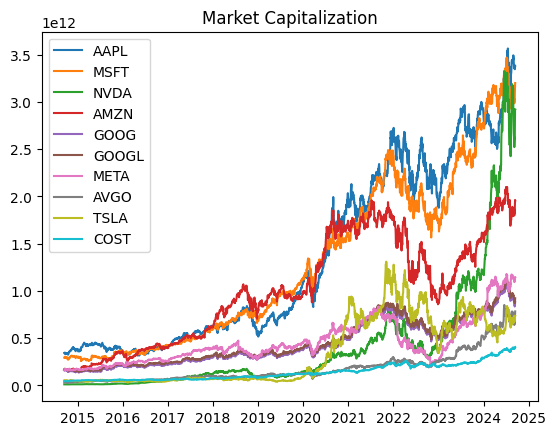

In [184]:
data = pd.DataFrame({"Ticker":[], "Market Cap":[]})

for ticker in company_names:
    stock = yf.Ticker(ticker)
    # Download historical market capitalization (get history of stock prices and shares outstanding)
    history = stock.history(period="10y")  # Get last 10 years of data
    history['Market Cap'] = history['Close'] * stock.info['sharesOutstanding']  # Calculate market cap
    history['Ticker'] = ticker  # Add company ticker for identification
    plt.plot(history["Market Cap"])
    plt.legend(labels=company_names)
    plt.title("Market Capitalization")
    plt.savefig("data/marketcap.png")